In [1]:
## Here we extract timeseries voxelwise from preprocessed data of first day
%config Completer.use_jedi = False
import nltools as nl
import nilearn
import glob
import os
import numpy as np
import pandas as pd

/gpfs/ysm/project/joormann/oad4/conda_envs/naturlistic/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


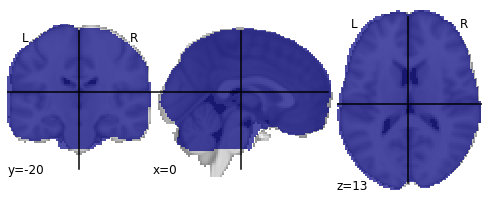

In [4]:
# create an average mask
# mask_all = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-*/ses-3/func/sub-*_ses-3_task-movie_space-MNI152NLin2009cAsym_res-2_desc-brain_mask.nii.gz')

# # mean of all masks
# group_mask = nilearn.image.mean_img(mask_all)
# # threshold the mask a bit
# group_mask = nilearn.image.math_img("a>=1", a=group_mask) # this will only take data from voxels that everyone has
# nilearn.plotting.plot_roi(group_mask)

# #mask = nl.Brain_Data(group_mask)

In [2]:
# use gray matter mask that was already created (using the following code)
#func_files = glob.glob('/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-*/ses-3/func/sub-*_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
# gray_mask = masking.compute_multi_gray_matter_mask(func_files, threshold=0.5, 
#                                            connected=True, opening=2,
#                                            memory=None, verbose=0, n_jobs=8)
group_mask = '/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/results/grayMatter_maskRCFmovies.nii.gz'


In [3]:
masker = nilearn.input_data.NiftiMasker(group_mask, standardize=True).fit()

In [6]:
data_dir = '/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/results/voxelwiseTS/' # where to save timeseries
base_dir = '/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep' # where to take them from

scan = 'ses-3'
file_list = glob.glob(os.path.join(base_dir, '*',f'{scan}', 'func', f'*denoise*nii.gz'))
for f in file_list[1:]:
    print(f)
    sub = os.path.basename(f).split('_')[0]
    print(sub)
    #data = nl.Brain_Data(f, mask=group_mask)
    data = masker.fit_transform(f)
    data = np.float32(data) # try to save some space reducing to float32
   # pd.DataFrame(data).to_csv(os.path.join(data_dir, f"{sub}_{scan}_voxelWise.csv" ), index=False)
    np.save(os.path.join(data_dir, f"{sub}_{scan}_voxelWiseGM" ),data)
  

/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1099/ses-3/func/sub-1099_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-1099
/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1272/ses-3/func/sub-1272_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-1272
/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1350/ses-3/func/sub-1350_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-1350
/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1271/ses-3/func/sub-1271_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-1271
/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1269/ses-3/func/sub-1269_ses-3_denoise_smooth6mm_task-movie_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
sub-1269
/gpfs/gibbs/pi/levy_ifat/Or/RCF_clips/derivatives/fmriprep/sub-1005/ses-3/func/sub-10

In [7]:
data.shape

(1020, 229007)